In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [3]:
%matplotlib inline

In [4]:
stocks = input("Enter the code of the stock:-")
data = yf.download(stocks, "2008-01-01", "2023-01-01", auto_adjust=True)
data.head()

Enter the code of the stock:-AAPL


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,6.032755,6.062727,5.829312,5.898640,1079178800
2008-01-03,5.915896,5.975839,5.833550,5.901364,842066400
2008-01-04,5.796010,5.842935,5.415765,5.450883,1455832000
2008-01-07,5.487212,5.558357,5.153590,5.377923,2072193200
2008-01-08,5.453609,5.523846,5.170847,5.184471,1523816000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3777 entries, 2008-01-02 to 2022-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3777 non-null   float64
 1   High    3777 non-null   float64
 2   Low     3777 non-null   float64
 3   Close   3777 non-null   float64
 4   Volume  3777 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 177.0 KB


In [7]:
data.describe()

,Open,High,Low,Close,Volume
count,3777.000000,3777.000000,3777.000000,3777.000000,3.777000e+03
mean,43.181754,43.668975,42.699955,43.201679,3.356507e+08
std,46.793681,47.384235,46.216498,46.821259,3.333849e+08
min,2.403475,2.482491,2.367449,2.367449,3.519590e+07
25%,11.735522,11.841482,11.572040,11.724928,1.087760e+08
50%,24.598711,24.853599,24.321151,24.536211,2.030708e+08
75%,49.230180,49.613288,48.795638,49.232582,4.452756e+08
max,180.566876,180.873372,177.096518,179.953873,3.372970e+09


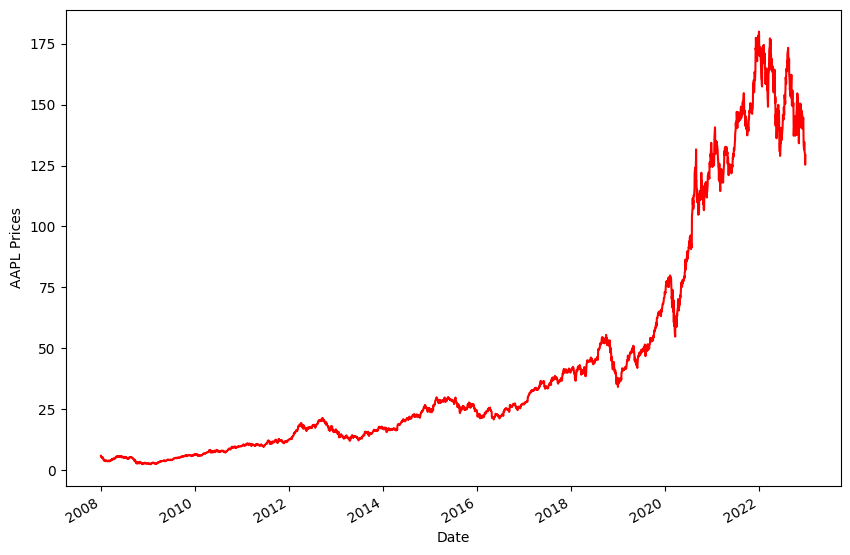

In [9]:
data.Close.plot(figsize=(10, 7), color='r')
plt.ylabel("{} Prices".format(stocks))
plt.show()

<ipython-input-10-7576e4f36f65>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Close"])


<Axes: xlabel='Close', ylabel='Density'>

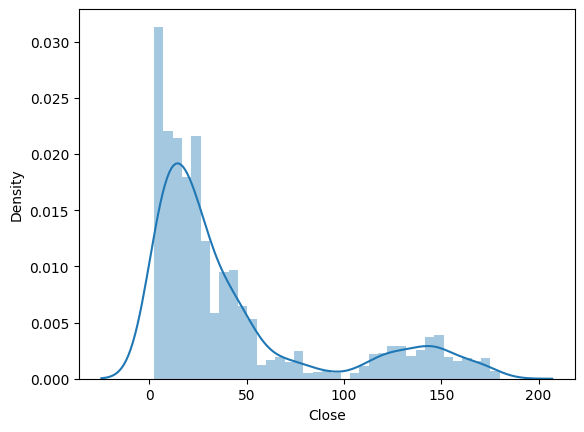

In [10]:
sns.distplot(data["Close"])

<ipython-input-11-daae21fed2ea>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Open"])


<Axes: xlabel='Open', ylabel='Density'>

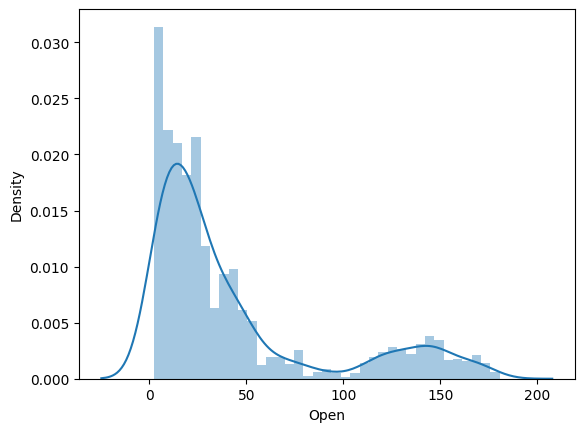

In [11]:
sns.distplot(data["Open"])

<ipython-input-12-f105f0b633a7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["High"])


<Axes: xlabel='High', ylabel='Density'>

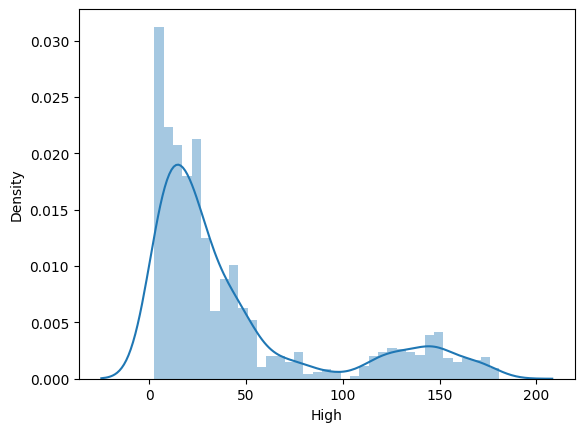

In [12]:
sns.distplot(data["High"])

In [13]:
# Conclusions

# - Shape of data
# - How our data is distributed
# - It's very very non linear

# Linear, Logis, Regularized, SVM

X = data.drop("Close", axis=1)
y = data["Close"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3021, 4)
(756, 4)
(3021,)
(756,)


In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred1 = lr.predict(X_test)

In [18]:
# MSE --> Mean Squared Error
# RMSE -> Root Mean Squared Error
# r2_square -> 1.0 # good model
from sklearn.metrics import mean_squared_error, r2_score
def calculate_metrics(y_test, y_pred):
    # y_test - ground truth (actual)
    # y_pred - model predicted value
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_scors = r2_score(y_test, y_pred)

    print("MSE: ", mse)
    print("RMSE: ", rmse)
    print("R2_score: ", r2_scors)

calculate_metrics(y_test, pred1)




MSE:  0.26439570390944434
RMSE:  0.5141942278064237
R2_score:  0.9998879785124823


In [19]:
from sklearn.linear_model import Lasso, Ridge

la = Lasso().fit(X_train, y_train)
ri = Ridge().fit(X_train, y_train)

la_p = la.predict(X_test)
ri_p = ri.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.205e+03, tolerance: 6.492e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.69119e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [21]:
calculate_metrics(y_test, la_p)

MSE:  0.7446872675592727
RMSE:  0.8629526450271027
R2_score:  0.999684484376206


In [22]:
calculate_metrics(y_test, ri_p)

MSE:  0.2643420334338261
RMSE:  0.5141420362446802
R2_score:  0.9998880012520596


In [23]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()

param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.118 total time=   0.7s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.157 total time=   0.7s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.179 total time=   0.7s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.176 total time=   0.7s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.164 total time=   0.7s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.118 total time=   0.7s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.157 total time=   0.7s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.179 total time=   0.6s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.176 total time=   0.7s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.164 total time=   0.7s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.118 total time=   1.2s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.0001], 'kernel': ['rbf']},
             verbose=3)

In [25]:
svr = SVR(C=10, gamma = 0.01, kernel='rbf')
svr.fit(X_train, y_train)
svr.pred = svr.predict(X_test)

In [30]:
import joblib
joblib.dump(ri, 'model.pkl')
ridge_from_joblib = model = joblib.load("model.pkl")